In [21]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
from collections import OrderedDict

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# LDA

In [3]:
# LDA data
class_1 = np.array([[4,1], [2,4], [2,3], [3,6], [4,4]])
class_2 = np.array([[9,10], [6,8], [9,5], [8,7], [10,8]])

In [4]:
print class_1, class_1.T

[[4 1]
 [2 4]
 [2 3]
 [3 6]
 [4 4]] [[4 2 2 3 4]
 [1 4 3 6 4]]


In [5]:
def compute_mean(data):
    return np.mean(data, axis=0)

def _diff_points(p1, p2):
    return (p1 - p2)[np.newaxis] #newaxis allows us to tranpose 1d array to 2d

def compute_sample_covariance(data):
    mean = compute_mean(data)
    variance = []
    for point in data:
        diff = _diff_points(point, mean) #newaxis allows us to tranpose 1d array to 2d
        var = np.dot(diff.T, diff)
        variance.append(var)
    
    return np.mean(variance, axis=0)


def compute_basis(mean_1, mean_2):
    diff = _diff_points(mean_1, mean_2)
    
    return np.dot(diff.T, diff)


def compute_weights(scatter, basis):
    eigvals, eigvecs = np.linalg.eig(np.dot(np.linalg.inv(scatter), basis))
    weights = eigvecs[:,0]
    return weights


def LDA(data_1, data_2):
    u_1 = compute_mean(class_1)
    u_2 = compute_mean(class_2)
    scatter_1 = compute_sample_covariance(data_1)
    scatter_2 = compute_sample_covariance(data_2)

    scatter = scatter_1 + scatter_2
    print scatter

    basis = compute_basis(u_1, u_2)
    print basis

    weights = compute_weights(scatter, basis)
    print weights
    
    return weights

In [6]:
def plot_eigenvectors(data, eigvectors, mean=[0, 0], title_extension=None, axis_lim=None, filename=None, scale=1.0):
    plt.figure()
    ax = plt.gca()
    ax.scatter(data[:,0], data[:,1])
    for col_idx in xrange(len(eigvectors[0])):
        weights = eigvectors[:,col_idx].T
        weights_norm = weights/weights.max(axis=0)
        x, y = zip(*np.array([np.zeros(len(weights)), weights_norm]))
        ax.quiver(mean[0], mean[1], x, y, angles='xy', scale_units='xy', scale=scale, label='eigvec')
    plt.draw()
    if title_extension:
        plt.title('PCA Eigenvectors, {}'.format(title_extension))
    else:
        plt.title('PCA Eigenvectors')
    plt.xlabel('x')
    plt.ylabel('y')
    
    if axis_lim:
        ax.set_xlim(axis_lim[0][0], axis_lim[0][1])
        ax.set_ylim(axis_lim[1][0], axis_lim[1][1])
        
    # reduce duplicate labels since we're labeling every projected point
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    # save image
    if filename is not None:
        plt.savefig('figures/'+filename+'.png')
        
    plt.show()

In [7]:
weights = LDA(class_1, class_2)

[[ 2.64 -0.44]
 [-0.44  5.28]]
[[29.16 21.6 ]
 [21.6  16.  ]]
[0.91955932 0.39295122]


In [8]:
def plot_lda(data_1, data_2, weights, axis_lim=None, filename=None, scale=0.09):
    x, y = zip(*np.array([np.zeros(len(weights)), weights]))
    plt.figure()
    ax = plt.gca()
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=0.09, label='LDA weights')
    ax.scatter(data_1[:,0], data_1[:,1], label='class 1')
    ax.scatter(data_2[:,0], data_2[:,1], label='class 2')
    for point in data_1:
        projection = np.dot(point, weights) * weights
        ax.plot(projection[0], projection[1], 'bo', label='projection 1')
    for point in data_2:
        projection = np.dot(point, weights) * weights
        ax.plot(projection[0], projection[1], 'ro', label='projection 2')
    plt.draw()
    if title_extension:
        plt.title('LDA Between Two Classes')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # reduce duplicate labels since we're labeling every projected point
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    # save image
    if filename is not None:
        plt.savefig('figures/'+filename+'.png')
    
    plt.show()

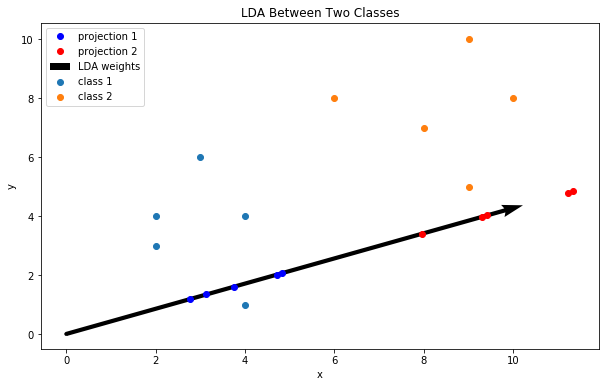

In [69]:
plot_lda(class_1, class_2, weights, filename='lda_demo')

# PCA

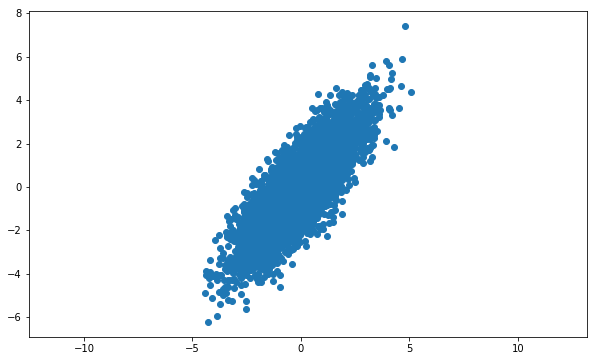

sample covariance:
[[1.98278524 1.97541819]
 [1.97541819 2.94880496]]
eigvals:
[0.43218364 4.49940656]
eigvecs:
[[-0.78661088 -0.61744905]
 [ 0.61744905 -0.78661088]]


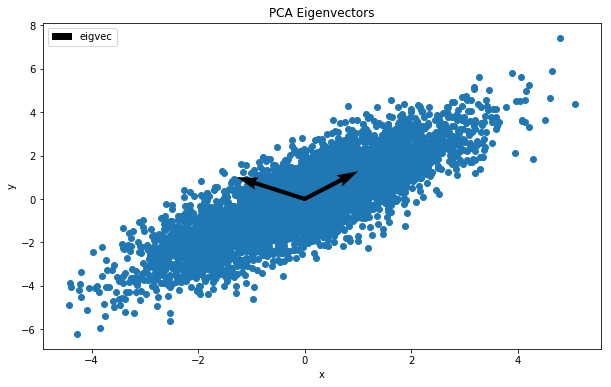

In [71]:
mean = [0, 0]
cov1 = [[2, 2], [2, 3]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov1, 5000).T
gauss_1 = np.vstack((x, y)).T
plt.scatter(gauss_1[:,0], gauss_1[:,1])
plt.axis('equal')
plt.show()

sample_cov = compute_sample_covariance(gauss_1)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print eigvecs
plot_eigenvectors(gauss_1, eigvecs, filename='pca_demo_cp')

/Users/aneesh/virtualenvironment/neuro/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


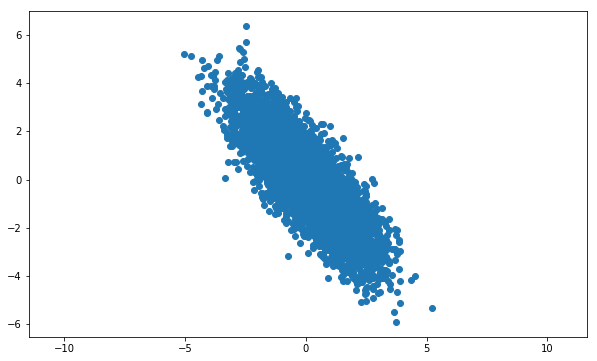

sample covariance:
[[ 2.0003928  -1.99231047]
 [-1.99231047  2.98015132]]
eigvals:
[0.43861841 4.54192571]
eigvecs:
[[-0.78701108  0.61693886]
 [-0.61693886 -0.78701108]]


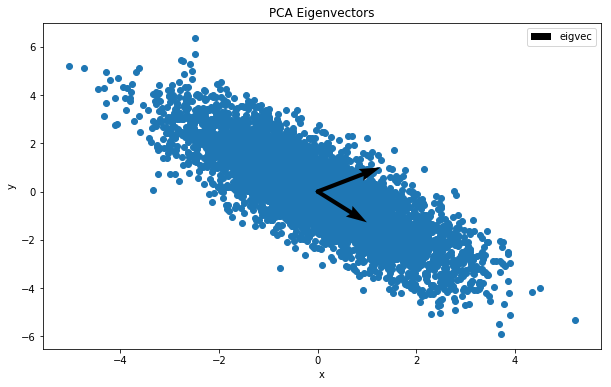

In [73]:
cov2 = [[-2, 2], [-2, 3]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov2, 5000).T
gauss_2 = np.vstack((x, y)).T
plt.scatter(gauss_2[:,0], gauss_2[:,1])
plt.axis('equal')
plt.show()

sample_cov = compute_sample_covariance(gauss_2)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print eigvecs
plot_eigenvectors(gauss_2, eigvecs, filename='pca_demo_reversed_cp')

sample covariance:
[[ 1.99187569 -0.0084036 ]
 [-0.0084036   2.96448446]]
eigvals:
[1.99180309 2.96455706]
eigvecs:
[[-0.99996268  0.0086393 ]
 [-0.0086393  -0.99996268]]


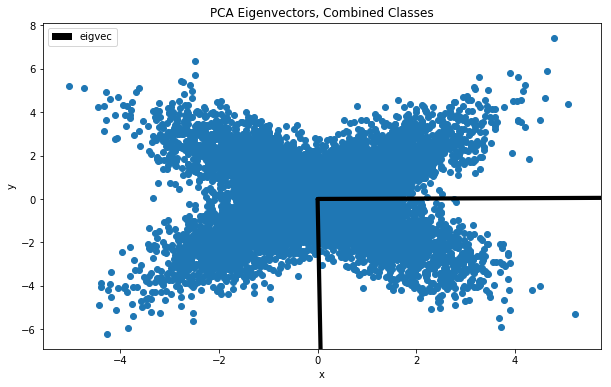

In [109]:
guass_1_2 = np.concatenate((gauss_1, gauss_2))

sample_cov = compute_sample_covariance(guass_1_2)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print 1*eigvecs
plot_eigenvectors(guass_1_2, eigvecs, mean=[0, 0], axis_lim=None, scale=0.001, title_extension='Combined Classes', filename='pca_gauss_combined')


sample covariance:
[[ 0.8  -0.4 ]
 [-0.4   2.64]]
eigvals:
[0.7168051 2.7231949]
eigvecs:
[[-0.97904802  0.2036295 ]
 [-0.2036295  -0.97904802]]


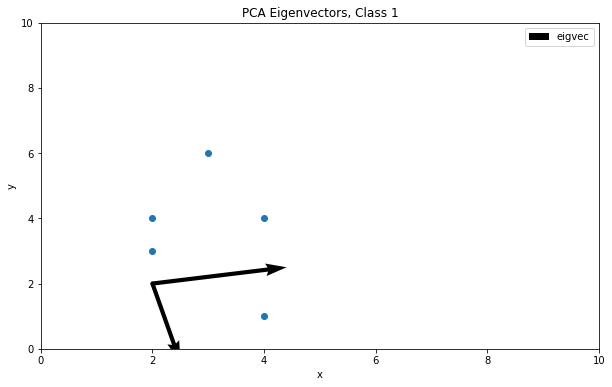

sample covariance:
[[ 1.84 -0.04]
 [-0.04  2.64]]
eigvals:
[1.83800498 2.64199502]
eigvecs:
[[-0.99875853  0.0498137 ]
 [-0.0498137  -0.99875853]]


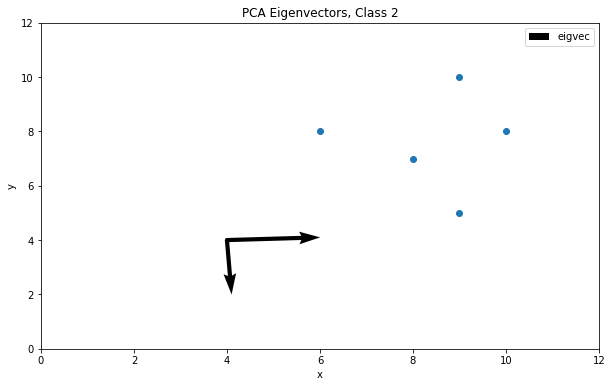

In [94]:
sample_cov = compute_sample_covariance(class_1)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print 1*eigvecs
plot_eigenvectors(class_1, eigvecs, mean=[2, 2], axis_lim=[[0, 10], [0, 10]], scale=2.0, title_extension='Class 1', filename='pca_demo_class_1')

sample_cov = compute_sample_covariance(class_2)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print 1*eigvecs
plot_eigenvectors(class_2, eigvecs, mean=[4, 4], axis_lim=[[0, 12], [0, 12]], scale=10.0, title_extension='Class 2', filename='pca_demo_class_2')

sample covariance:
[[8.61 5.18]
 [5.18 6.64]]
eigvals:
[12.89781945  2.35218055]
eigvecs:
[[-0.7703269   0.63764917]
 [-0.63764917 -0.7703269 ]]


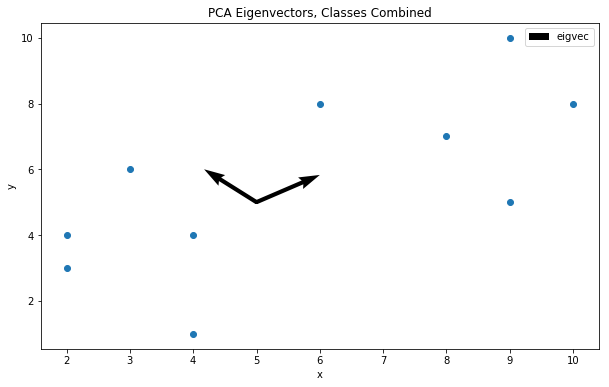

In [79]:
class_1_2 = np.concatenate((class_1, class_2))

sample_cov = compute_sample_covariance(class_1_2)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print -1*eigvecs
plot_eigenvectors(class_1_2, eigvecs, mean=[5, 5], title_extension='Classes Combined', filename='pca_combined_1_2')

sample covariance:
[[6.25 4.25]
 [4.25 3.5 ]]
eigvals:
[9.3418921 0.4081079]
eigvecs:
[[-0.80864711  0.58829402]
 [-0.58829402 -0.80864711]]


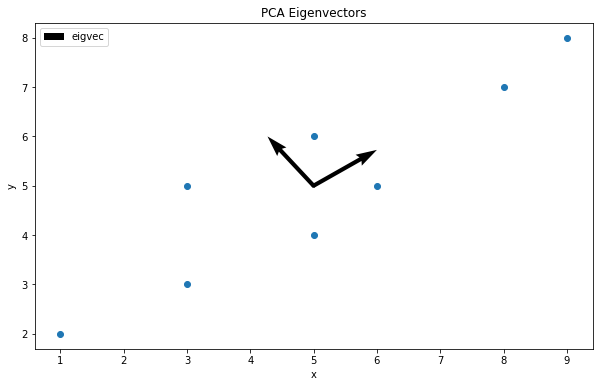

In [134]:
class_3 = np.array([[1,2], [3,3], [3,5], [5,4], [5,6], [6,5], [8,7], [9,8]])

sample_cov = compute_sample_covariance(class_3)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print -1*eigvecs
plot_eigenvectors(class_3, eigvecs, mean=[5, 5], filename='pca_demo_2')

sample covariance:
[[3.05443352 0.00475115]
 [0.00475115 0.3292071 ]]
eigvals:
[3.05444181 0.32919881]
eigvecs:
[[ 0.99999848 -0.00174339]
 [ 0.00174339  0.99999848]]


TypeError: 'int' object has no attribute '__getitem__'

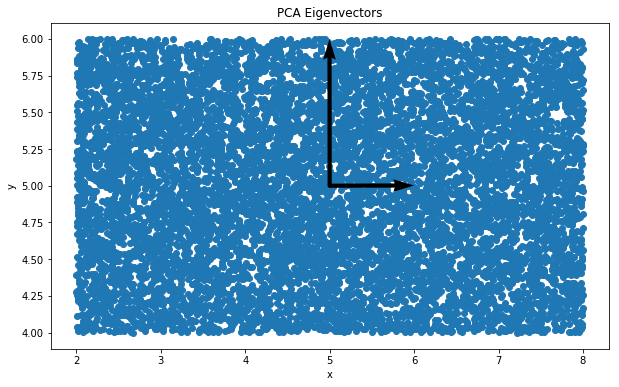

In [111]:
uni_1 = []
for ii in xrange(10000):
    x = np.random.uniform(2, 8)
    y = np.random.uniform(4, 6)
    uni_1.append([x, y])
uni_1 = np.asarray(uni_1)
    
sample_cov = compute_sample_covariance(uni_1)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print eigvecs
plot_eigenvectors(uni_1, eigvecs, mean=[5, 5], axis_lim=[10, 10], filename=None)

sample covariance:
[[ 3.00347084 -0.01982821]
 [-0.01982821  2.96714351]]
eigvals:
[3.01219726 2.95841709]
eigvecs:
[[ 0.9152809   0.40281619]
 [-0.40281619  0.9152809 ]]


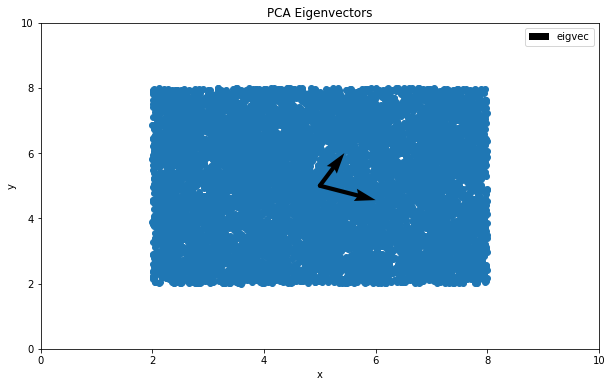

In [112]:
uni_2 = []
for ii in xrange(10000):
    x = np.random.uniform(2, 8)
    y = np.random.uniform(2, 8)
    uni_2.append([x, y])
uni_2 = np.asarray(uni_2)

    
sample_cov = compute_sample_covariance(uni_2)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print eigvecs
plot_eigenvectors(uni_2, eigvecs, mean=[5, 5], axis_lim=[[0,10], [0,10]], filename=None)

[[ 3.98317804 -0.01689228]
 [-0.01689228  5.92895629]]
[[29.16 21.6 ]
 [21.6  16.  ]]
[0.89462827 0.44681122]


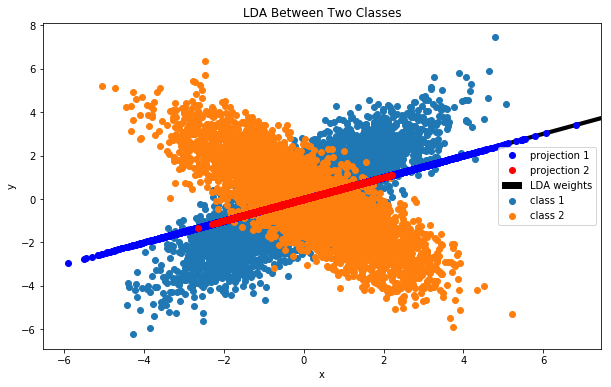

In [74]:
weights = LDA(gauss_1, gauss_2)
plot_lda(gauss_1, gauss_2, weights, filename='lda_gaussian_resize')

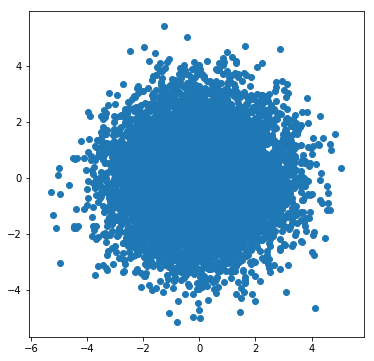

sample covariance:
[[2.00523835 0.03320143]
 [0.03320143 1.99341821]]
eigvals:
[2.03305163 1.96560494]
eigvecs:
[[ 0.76656756 -0.64216366]
 [ 0.64216366  0.76656756]]


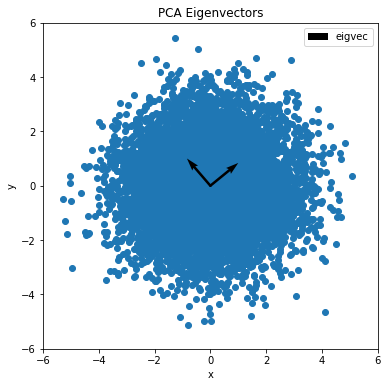

In [20]:
mean = [0, 0]
cov3 = [[2, 0], [0, 2]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov3, 10000).T
gauss_3 = np.vstack((x, y)).T
plt.scatter(gauss_3[:,0], gauss_3[:,1])
plt.axis('equal')
plt.show()

sample_cov = compute_sample_covariance(gauss_3)
eigvals, eigvecs = np.linalg.eig(sample_cov)
print 'sample covariance:'
print sample_cov
print 'eigvals:'
print eigvals
print 'eigvecs:'
print eigvecs
plot_eigenvectors(gauss_3, eigvecs, axis_lim=[[-6, 6], [-6, 6]], filename='pca_equal')

[[ 2.51413251 -0.61069738]
 [-0.61069738  2.22381888]]
[[29.16 21.6 ]
 [21.6  16.  ]]
[0.73443526 0.67867875]


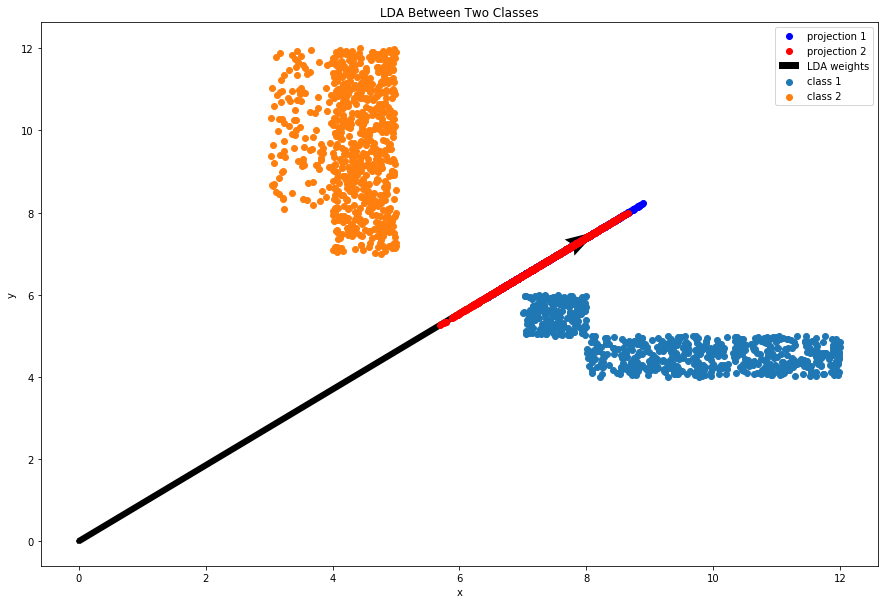

In [27]:
uni_3 = []
for ii in xrange(500):
    x = np.random.uniform(8, 12)
    y = np.random.uniform(4, 5)
    uni_3.append([x, y])
for ii in xrange(200):
    x = np.random.uniform(7, 8)
    y = np.random.uniform(5, 6)
    uni_3.append([x, y])
uni_3 = np.asarray(uni_3)

uni_4 = []
for ii in xrange(500):
    x = np.random.uniform(4, 5)
    y = np.random.uniform(7, 12)
    uni_4.append([x, y])
for ii in xrange(200):
    x = np.random.uniform(3, 5)
    y = np.random.uniform(8, 12)
    uni_4.append([x, y])
uni_4 = np.asarray(uni_4)

weights = LDA(uni_3, uni_4)
plot_lda(uni_3, uni_4, weights, filename='lda_uniform')

# Expectation Maximization

In [23]:
class Coins(object):
    def __init__(self, p1, p2):
        assert 0 <= p1 < 1.0 and 0 <= p2 < 1.0, 'probabilities must be within [0, 1)'
        self.p1 = p1
        self.p2 = p2
        
    def flip(self, n=10):
        which_coin = np.random.random()
        heads = 0
        if which_coin >= 0.5:
            for ii in range(n):
                which_side = np.random.random()
                if which_side <= self.p1:
                    heads += 1
        else:
            for ii in range(10):
                which_side = np.random.random()
                if which_side <= self.p2:
                    heads += 1
                    
        return heads

In [54]:
# test coins
p_coin_a = 0.7
p_coin_b = 0.3
coins = Coins(p_coin_a, p_coin_b)
num_flips = 10
count = 0
for ii in range(1000):
    count += coins.flip(num_flips)
print count

5102


In [55]:
def run_trials(coins, num_trials=5):
    trials = []
    for ii in range(num_trials):
        trials.append(coins.flip(num_flips))
    return trials

In [56]:
class MLE(object):
    def __init__(self, theta_a, theta_b, target_a=None, target_b=None):
        self.theta_a0 = theta_a
        self.theta_b0 = theta_b
        self.theta_a = theta_a
        self.theta_b = theta_b
        self.target_a = target_a
        self.target_b = target_b
        
        
    def approximate_probabilities(self, trials, steps=10):
        self.trials = trials
        self.history = {'theta_a': [self.theta_a0], 'theta_b': [self.theta_b0]}
        
        for ii in xrange(steps):
            flips_a, flips_b = self.expectation_step()
            self.maximize_likelihood(flips_a, flips_b)
            self.history['theta_a'].append(self.theta_a)
            self.history['theta_b'].append(self.theta_b)
            
        
    def expectation_step(self):
        flips_a = {'tails': 0, 'heads': 0}
        flips_b = {'tails': 0, 'heads': 0}

        for num_heads in self.trials:
            # get likelihoods of each coin for this trial
            lh_a = self.get_likelihood(num_heads, self.theta_a)
            lh_b = self.get_likelihood(num_heads, self.theta_b)
            lh_total = lh_a + lh_b
            
            # assign credit to the distributions of A and B
            credit_a = lh_a*1.0 / lh_total
            credit_b = lh_b*1.0 / lh_total
            
            flips_a['heads'] += credit_a * num_heads
            flips_a['tails'] += credit_a * (num_flips - num_heads)
            flips_b['heads'] += credit_b * num_heads
            flips_b['tails'] += credit_b * (num_flips - num_heads)
            
        return flips_a, flips_b
    
    
    def maximize_likelihood(self, flips_a, flips_b):
        # update p(h|coin_i) prior
        self.theta_a = flips_a['heads'] / (flips_a['heads'] + flips_a['tails'])
        self.theta_b = flips_b['heads'] / (flips_b['heads'] + flips_b['tails'])
            

    def get_likelihood(self, num_heads, prior):
        # treat flips like binomial random variable
        # and calculate probability of flipping this combination given the coin's prior
        heads = pow(prior, num_heads)
        tails = pow(1-prior, num_flips - num_heads)

        return heads * tails # probability of binomial distribution
    
    
    def plot_convergence(self, save=False, run_num=None):
        a_history = self.history['theta_a']
        b_history = self.history['theta_b']
        
        plt.figure()
        ax = plt.gca()
        ax.plot(a_history, label='Theta_A')
        ax.plot(b_history, label='Theta_B')
        if self.target_a is not None and self.target_b is not None:
            ax.axhline(y=self.target_a, color='g', label='Theta_A_Target')
            ax.axhline(y=self.target_b, color='r', label='Theta_B_Target')
        num_trials = len(self.trials)
        plt.title('Convergence of Theta_A and Theta_B, {} Trials'.format(num_trials))
        plt.xlabel('steps')
        plt.ylabel('probability')
        plt.legend()
        if save:
            fname = 'convergence_{}_{}_{}_run_{}.png'.format(str(int(self.target_a*100)),
                                                      str(int(self.target_b*100)),
                                                      num_trials,
                                                      run_num)
            plt.savefig('figures/'+fname)
        plt.show()

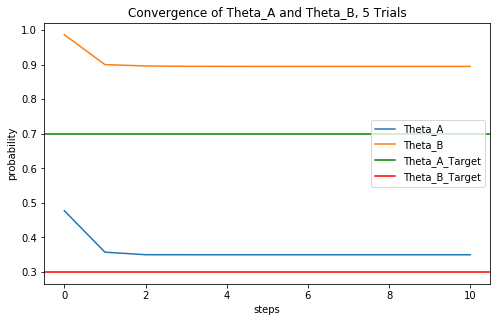

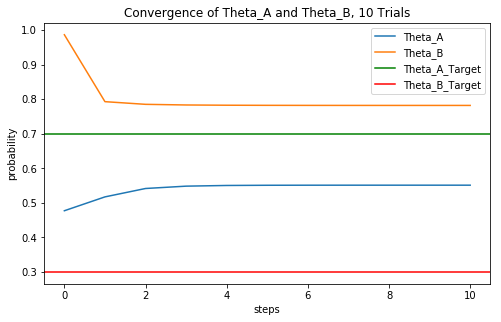

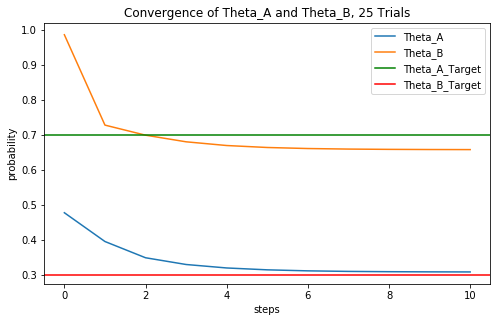

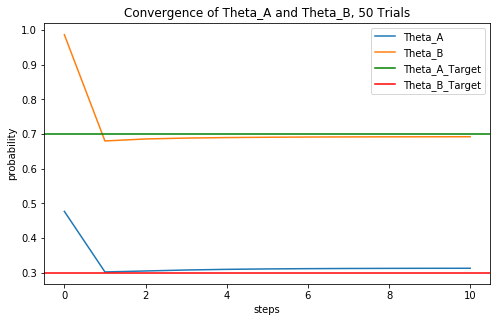

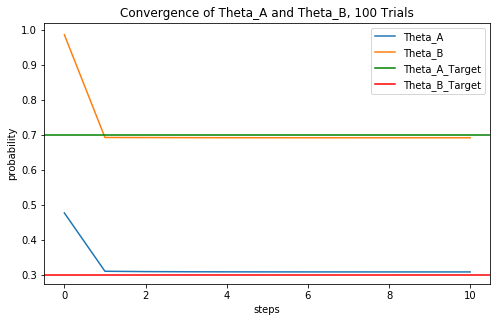

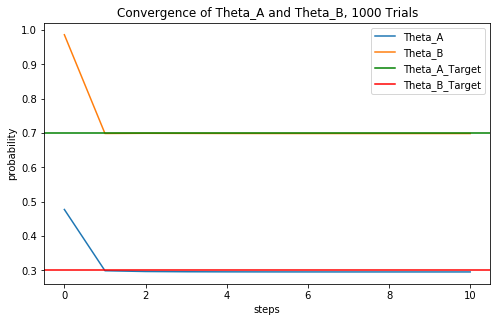

In [59]:
mle = MLE(np.random.random(), np.random.random(), target_a=p_coin_a, target_b=p_coin_b)
for num_trials in [5, 10, 25, 50, 100, 1000]:
    trials = run_trials(coins, num_trials)
    mle.approximate_probabilities(trials, steps=10)
    mle.plot_convergence(save=True, run_num=2)
